In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
import re
warnings.filterwarnings("ignore")

### Read file csv 

In [2]:
df = pd.read_csv('nycdata.csv')
df.head()

,TOTAL_AMOUNT,RATECODEDESC,Ngày,Giờ,Tháng,Quý,Năm,PAYMENT_TYPE,BOROUGH,CITY,NTANAME,STATES,VENDORCODE,TOTAL_FARE_AMOUNT,TOTAL_PASSENGER_COUNT,TOTAL_TIP_AMOUNT,TOTAL_TOLLS_AMOUNT,TOTAL_TRIP_DISTANCE,LONGTITUDE,LATITUDE
0,6.00,Standard rate,18,11,5,2,2011,Credit card,Manhattan,New York,Clinton,New York,VTS,4.5,1,1.00,0.0,0.72,-73.9871,40.7624
1,6.00,Standard rate,18,12,5,2,2011,Credit card,Manhattan,New York,Clinton,New York,VTS,4.5,1,1.00,0.0,0.72,-73.9969,40.7627
2,6.00,Standard rate,18,12,5,2,2011,Credit card,Manhattan,New York,Clinton,New York,VTS,4.5,1,1.00,0.0,0.72,-73.9871,40.7624
3,11.88,Standard rate,14,20,6,2,2011,Credit card,Manhattan,New York,Upper East Side-Carnegie Hill,New York,CMT,8.9,2,1.98,0.0,2.60,-73.9640,40.7738
4,11.88,Standard rate,14,20,6,2,2011,Credit card,Manhattan,New York,Hudson Yards-Chelsea-Flatiron-Union Square,New York,CMT,8.9,2,1.98,0.0,2.60,-73.9899,40.7441


### Get longtitude , latitude for Clustering

In [3]:
x = df.iloc[:,[18,19]]
x

,LONGTITUDE,LATITUDE
0,-73.9871,40.7624
1,-73.9969,40.7627
2,-73.9871,40.7624
3,-73.9640,40.7738
4,-73.9899,40.7441
...,...,...
1048570,-73.9857,40.7590
1048571,-73.9772,40.7896
1048572,-73.9770,40.7903
1048573,-73.9772,40.7896


### Select number of cluster using wcss 

In [4]:
# An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). 
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. 
# The idea is to minimise the sum and also find the best number of cluster 
wcss =[]
for i in range(1,10):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [5]:
wcss

[276247211.5313753,
 201567772.73898265,
 147225945.7853135,
 109459245.98931496,
 82611281.25162071,
 52615865.64496054,
 34216890.53368346,
 23836834.128556732,
 16300043.850490436]

Text(0.5, 0, 'number of cluster')

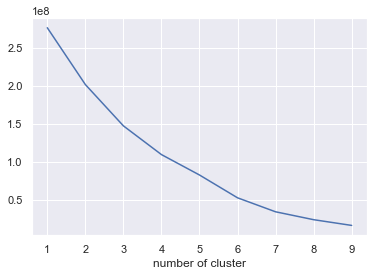

In [6]:
# plotting
number = range(1,10)
plt.plot(number,wcss)
plt.xlabel("number of cluster")

> Depending on wcss we choose the quantity A to be 3

### Kmeans with 3 cluster

In [7]:
kmeans = KMeans(3)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
# Predict rank
iden = kmeans.fit_predict(x)
iden

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
df['rank'] = iden

In [11]:
df['rank'].unique()

array([0, 2, 1])

In [12]:
df.head()

,TOTAL_AMOUNT,RATECODEDESC,Ngày,Giờ,Tháng,Quý,Năm,PAYMENT_TYPE,BOROUGH,CITY,...,STATES,VENDORCODE,TOTAL_FARE_AMOUNT,TOTAL_PASSENGER_COUNT,TOTAL_TIP_AMOUNT,TOTAL_TOLLS_AMOUNT,TOTAL_TRIP_DISTANCE,LONGTITUDE,LATITUDE,rank
0,6.00,Standard rate,18,11,5,2,2011,Credit card,Manhattan,New York,...,New York,VTS,4.5,1,1.00,0.0,0.72,-73.9871,40.7624,0
1,6.00,Standard rate,18,12,5,2,2011,Credit card,Manhattan,New York,...,New York,VTS,4.5,1,1.00,0.0,0.72,-73.9969,40.7627,0
2,6.00,Standard rate,18,12,5,2,2011,Credit card,Manhattan,New York,...,New York,VTS,4.5,1,1.00,0.0,0.72,-73.9871,40.7624,0
3,11.88,Standard rate,14,20,6,2,2011,Credit card,Manhattan,New York,...,New York,CMT,8.9,2,1.98,0.0,2.60,-73.9640,40.7738,0
4,11.88,Standard rate,14,20,6,2,2011,Credit card,Manhattan,New York,...,New York,CMT,8.9,2,1.98,0.0,2.60,-73.9899,40.7441,0


In [13]:
# create column ratio
df['ratio'] =  df['TOTAL_TIP_AMOUNT']/df['TOTAL_AMOUNT']

In [14]:
df.head()

,TOTAL_AMOUNT,RATECODEDESC,Ngày,Giờ,Tháng,Quý,Năm,PAYMENT_TYPE,BOROUGH,CITY,...,VENDORCODE,TOTAL_FARE_AMOUNT,TOTAL_PASSENGER_COUNT,TOTAL_TIP_AMOUNT,TOTAL_TOLLS_AMOUNT,TOTAL_TRIP_DISTANCE,LONGTITUDE,LATITUDE,rank,ratio
0,6.00,Standard rate,18,11,5,2,2011,Credit card,Manhattan,New York,...,VTS,4.5,1,1.00,0.0,0.72,-73.9871,40.7624,0,0.166667
1,6.00,Standard rate,18,12,5,2,2011,Credit card,Manhattan,New York,...,VTS,4.5,1,1.00,0.0,0.72,-73.9969,40.7627,0,0.166667
2,6.00,Standard rate,18,12,5,2,2011,Credit card,Manhattan,New York,...,VTS,4.5,1,1.00,0.0,0.72,-73.9871,40.7624,0,0.166667
3,11.88,Standard rate,14,20,6,2,2011,Credit card,Manhattan,New York,...,CMT,8.9,2,1.98,0.0,2.60,-73.9640,40.7738,0,0.166667
4,11.88,Standard rate,14,20,6,2,2011,Credit card,Manhattan,New York,...,CMT,8.9,2,1.98,0.0,2.60,-73.9899,40.7441,0,0.166667


### Predicting ratio using linear regression

In [15]:
x =df.drop(['LONGTITUDE','LATITUDE','rank','ratio'],axis =1 )

In [16]:
# because of the data is very big . we decided to get 100000 rows to mining
x=x[:100000]

In [17]:
price = x['TOTAL_AMOUNT']
TIP = x['TOTAL_TIP_AMOUNT']
x =x.drop(['TOTAL_AMOUNT','TOTAL_TIP_AMOUNT'],axis = 1)

### get dummies values

In [18]:
data_dummies = pd.get_dummies(x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,Ngày,Giờ,Tháng,Quý,Năm,TOTAL_FARE_AMOUNT,TOTAL_PASSENGER_COUNT,TOTAL_TOLLS_AMOUNT,TOTAL_TRIP_DISTANCE,RATECODEDESC_JFK,...,NTANAME_park-cemetery-etc-Brooklyn,NTANAME_park-cemetery-etc-Queens,STATES_Connecticut,STATES_Massachusetts,STATES_New Jersey,STATES_New York,STATES_Pennsylvania,STATES_UNKNOWN,STATES_Valencian Community,VENDORCODE_VTS
0,18.0,11.0,5.0,2.0,2011.0,4.5,1.0,0.0,0.72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,12.0,5.0,2.0,2011.0,4.5,1.0,0.0,0.72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,18.0,12.0,5.0,2.0,2011.0,4.5,1.0,0.0,0.72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,14.0,20.0,6.0,2.0,2011.0,8.9,2.0,0.0,2.60,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14.0,20.0,6.0,2.0,2011.0,8.9,2.0,0.0,2.60,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,18.0,23.0,3.0,1.0,2011.0,9.3,5.0,0.0,2.77,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99996,7.0,17.0,6.0,2.0,2011.0,7.7,1.0,0.0,1.40,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,7.0,17.0,6.0,2.0,2011.0,7.7,1.0,0.0,1.40,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99998,5.0,22.0,5.0,2.0,2011.0,8.9,1.0,0.0,2.55,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [19]:
y = df['ratio'][:100000]
y

0        0.166667
1        0.166667
2        0.166667
3        0.166667
4        0.166667
           ...   
99995    0.000000
99996    0.166667
99997    0.166667
99998    0.000000
99999    0.000000
Name: ratio, Length: 100000, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
# we split 80:20 in this data. 80% for training and 20% for testing
X,X_test,Y,Y_test = train_test_split(data_preprocessed,y,test_size=0.2,random_state=365)

In [22]:
# Running model
reg = LinearRegression().fit(X, Y)

In [23]:
reg.predict(X_test)

array([-0.00442425,  0.14931924,  0.15024611, ..., -0.00074275,
        0.00117643,  0.13578069])

In [24]:
Y_test

45640    0.000000
79100    0.166667
13142    0.083333
25071    0.000000
65664    0.000000
           ...   
30284    0.000000
13765    0.073171
77926    0.000000
83504    0.000000
32236    0.198198
Name: ratio, Length: 20000, dtype: float64

In [25]:
Y_pre = reg.predict(X_test)

In [26]:
price_test = price [80000:]
price_test

80000     9.50
80001     9.50
80002     8.90
80003     8.90
80004    25.00
         ...  
99995    10.30
99996    11.04
99997    11.04
99998     9.90
99999     9.90
Name: TOTAL_AMOUNT, Length: 20000, dtype: float64

In [27]:
# predicting TOTAL_TIP_AMOUNT
predict = price_test * Y_pre
predict

80000   -0.042030
80001    1.418533
80002    1.337190
80003    0.022667
80004   -0.256560
           ...   
99995    0.019329
99996    1.618440
99997   -0.008200
99998    0.011647
99999    1.344229
Name: TOTAL_AMOUNT, Length: 20000, dtype: float64

In [28]:
# REAl TOTAL_TIP_AMOUNT values
TOTAL_TIP_AMOUNT = TIP[80000:]

In [29]:
# create diff column for comparing
diff = np.abs((predict - TOTAL_TIP_AMOUNT))
diff

80000    0.042030
80001    1.418533
80002    0.062810
80003    1.377333
80004    0.256560
           ...   
99995    0.019329
99996    0.221560
99997    1.848200
99998    0.011647
99999    1.344229
Length: 20000, dtype: float64

In [30]:
data = {'predict':predict,
        'real':TOTAL_TIP_AMOUNT,
       'different': diff}
A = pd.DataFrame(data)

In [31]:
A

,predict,real,different
80000,-0.042030,0.00,0.042030
80001,1.418533,0.00,1.418533
80002,1.337190,1.40,0.062810
80003,0.022667,1.40,1.377333
80004,-0.256560,0.00,0.256560
...,...,...,...
99995,0.019329,0.00,0.019329
99996,1.618440,1.84,0.221560
99997,-0.008200,1.84,1.848200
99998,0.011647,0.00,0.011647


In [32]:
# average different in test set
A['different'].mean()

1.2497316175627522

In [33]:
# export to csv file
A.to_csv("result.csv")